In [41]:
%run qboot

## Majorana Chain

In [42]:
L = 4
H = sum(1j*maj(i)@maj((i+1)%L) for i in range(L))
H

i χ0 χ1 +i χ1 χ2 +i χ2 χ3 -i χ0 χ3

In [43]:
base = OperatorSpace([maj()]+[maj(i) for i in range(L)])
base

OperatorSpace([I, χ0, χ1, χ2, χ3])

In [44]:
ope = base.outer(base)
ope

Operators([[I, χ0, χ1, χ2, χ3],
           [χ0, I, χ0 χ1, χ0 χ2, χ0 χ3],
           [χ1, - χ0 χ1, I, χ1 χ2, χ1 χ3],
           [χ2, - χ0 χ2, - χ1 χ2, I, χ2 χ3],
           [χ3, - χ0 χ3, - χ1 χ3, - χ2 χ3, I]])

In [47]:
full = base.append(list(ope.orth().solve(base).basis()))
full

OperatorSpace([I, χ0, χ1, χ2, χ3, i χ0 χ2, i χ0 χ3, i χ1 χ2, i χ1 χ3,
               i χ2 χ3, i χ0 χ1])

In [48]:
eqs = full.adjoint(H)
eqs

OperatorSpace([0, 2 χ1 -2 χ3, -2 χ0 +2 χ2, -2 χ1 +2 χ3, 2 χ0 -2 χ2,
               2i χ1 χ2 +2i χ2 χ3 +2i χ0 χ3 -2i χ0 χ1, 2i χ1 χ3 -2i χ0 χ2,
               -2i χ0 χ2 +2i χ1 χ3,
               -2i χ0 χ3 -2i χ0 χ1 -2i χ1 χ2 +2i χ2 χ3,
               -2i χ1 χ3 -2i χ0 χ2, 2i χ1 χ3 +2i χ0 χ2])

In [49]:
null = full.solve(eqs.append(maj())).round(10)
null

OperatorSpace([0.71i χ2 χ3 +0.71i χ0 χ1, -0.71i χ0 χ3 +0.71i χ1 χ2,
               -0.71 χ0 -0.71 χ2, -0.71 χ1 -0.71 χ3])

In [50]:
b = null.represent(H).real
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)

In [51]:
E, x = SDP(b, C, As)
E, x

(-1.9999999999859985,
 array([-7.07106781e-01, -7.07106781e-01,  7.62755857e-33, -2.46835709e-32]))

In [52]:
(full.represent(maj()) + x @ full.represent(null)).real

array([ 1.00000000e+00, -5.39349839e-33,  1.74539204e-32, -5.39349839e-33,
        1.74539204e-32,  0.00000000e+00,  5.00000000e-01, -5.00000000e-01,
        0.00000000e+00, -5.00000000e-01, -5.00000000e-01])

## Single-Site Interaction

Consider $H=-(c_1 c_2 c_3 c_4+\text{h.c.})$, where
$$c_a=\frac{1}{2}(\chi_{2a}+\mathrm{i}\chi_{2a+1})$$

In [90]:
%run qboot

In [91]:
def c(a):
    return (maj(2*a) + 1j*maj(2*a+1))/2

In [92]:
H = -(c(0)@c(1)@c(2)@c(3)).real
H

-0.06 χ0 χ2 χ4 χ6 +0.06 χ0 χ2 χ5 χ7 +0.06 χ0 χ3 χ4 χ7 +0.06 χ0 χ3 χ5 χ6 +0.06 χ1 χ2 χ4 χ7 +0.06 χ1 χ2 χ5 χ6 +0.06 χ1 χ3 χ4 χ6 -0.06 χ1 χ3 χ5 χ7

In [95]:
base = OperatorSpace(list(H.factors()))
base.size

73

In [97]:
ope = base.outer(base)
ope.shape

(73, 73)

In [98]:
full = OperatorSpace(list(ope.basis()))
full.size

256

In [100]:
from itertools import combinations
SU4 = [(c(a).H@c(b)).real for (a,b) in combinations(range(4),2)]
eqs = numpy.concatenate([full.adjoint(g) for g in SU4]+[full.adjoint(H)])
eqs = Operators(eqs)
eqs.size

1792

In [101]:
null = full.solve(eqs.append(maj())).round(10)
null.size

4

In [104]:
b = null.represent(H).real
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((4,), (73, 73), (4, 73, 73))

In [105]:
E, x = SDP(b, C, As)
E, x

(-0.4999999992376596,
 array([ 2.66561068, -2.61709801,  0.21287978,  1.        ]))

The $x.A$ matrix has no null space. It seems not possible to further reduce the base space dimension.

In [112]:
rndx = numpy.random.randn(4)
A = numpy.tensordot(rndx, As, axes=([0],[0]))
scipy.linalg.null_space(A)

array([], shape=(73, 0), dtype=complex128)

In [109]:
import matplotlib.pyplot as plt

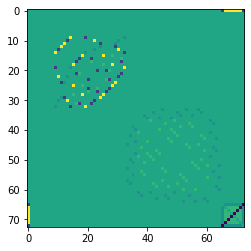

In [113]:
plt.imshow(A.real)

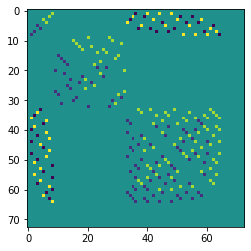

In [114]:
plt.imshow(A.imag)

The base space size can be reduce by setting a cutoff on factors. Sometimes the result may not be affected.

In [126]:
base = OperatorSpace(list(H.factors(2)))
base.size

33

In [127]:
ope = base.outer(base)
ope.shape

(33, 33)

In [128]:
full = OperatorSpace(list(ope.basis()))
full.size

163

In [129]:
from itertools import combinations
SU4 = [(c(a).H@c(b)).real for (a,b) in combinations(range(4),2)]
eqs = numpy.concatenate([full.adjoint(g) for g in SU4]+[full.adjoint(H)])
eqs = Operators(eqs)
eqs.size

1141

In [130]:
null = full.solve(eqs.append(maj())).round(10)
null.size

2

In [131]:
b = null.represent(H).real
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((2,), (33, 33), (2, 33, 33))

In [132]:
E, x = SDP(b, C, As)
E, x

(-0.4999999998572637, array([ 3.0675167 , -2.14250818]))

## Two-Fermion Model

Consider a two-site system with four complex fermion modes per site. Define complex fermion operator ($i=0,1$, $a=0,1,2,3$)
$$c_{i,a}=\frac{1}{2}(\chi_{8i+2a} + \mathrm{i}\chi_{8i+2a+1})$$

In [134]:
%run qboot

In [194]:
def c(i, a):
    return (maj(8*i+2*a) + 1j*maj(8*i+2*a+1))/2

In [195]:
H0 = -sum(c(1,a).H@c(0,a) for a in range(4)).real
Hint = -sum(c(i,0)@c(i,1)@c(i,2)@c(i,3) for i in range(2)).real
H = Hint
H

-0.06 χ0 χ2 χ4 χ6 +0.06 χ0 χ2 χ5 χ7 +0.06 χ0 χ3 χ4 χ7 +0.06 χ0 χ3 χ5 χ6 +0.06 χ1 χ2 χ4 χ7 +0.06 χ1 χ2 χ5 χ6 +0.06 χ1 χ3 χ4 χ6 -0.06 χ1 χ3 χ5 χ7 -0.06 χ8 χ10 χ12 χ14 +0.06 χ8 χ10 χ13 χ15 +0.06 χ8 χ11 χ12 χ15 +0.06 χ8 χ11 χ13 χ14 +0.06 χ9 χ10 χ12 χ15 +0.06 χ9 χ10 χ13 χ14 +0.06 χ9 χ11 χ12 χ14 -0.06 χ9 χ11 χ13 χ15

In [197]:
base = OperatorSpace(list(H.factors(2)))
base.size

65

In [198]:
ope = base.outer(base)
ope.shape

(65, 65)

In [199]:
full = OperatorSpace(list(ope.basis()))
full.size

1349

In [193]:
SU4 = sum(c(i,1).H@c(i,2) for i in range(2)).real
eqs = full.adjoint(SU4)
eqs.size

137

In [159]:
%load_ext snakeviz

In [161]:
%snakeviz (full.solve(eqs));

 
*** Profile stats marshalled to file '/var/folders/1m/3nz1kxmj2mgb2s2gwq2ndxqh0000gn/T/tmp01w5y5vq'. 
Embedding SnakeViz in this document...


In [200]:
from itertools import combinations
SU4 = [sum(c(i,a).H@c(i,b) for i in range(2)).real for (a,b) in combinations(range(4),2)]
eqs = numpy.concatenate([full.adjoint(g) for g in SU4]+[full.adjoint(H)])
eqs = Operators(eqs)
eqs.size

9443

In [201]:
full.represent(eqs).shape

(9443, 1349)

In [202]:
null = full.solve(eqs.append(maj())).round(10)
null.size

11

In [203]:
b = null.represent(H).real
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((11,), (65, 65), (11, 65, 65))

In [204]:
E, x = SDP(b, C, As)
E, x

(-1.0000003560744346,
 array([-2.49684118,  0.02097096,  0.55262396,  0.09308987, -0.02043605,
        -2.59080461, -1.64200248, -0.17430355,  0.01927475, -3.46580678,
         0.00609439]))

It becomes slow to solve as the problem size gets larger.

## Two-Site Hubbard Model

In [1]:
%run qboot

In [36]:
def c(i,a):
    return (maj(4*i+2*a+1)+1j*maj(4*i+2*a+2))/2

In [99]:
t, U = 1., 2.
H = (1j*t/4)*(maj(1,6)-maj(2,5)+maj(3,8)-maj(4,7))-(U/4)*(maj(1,2,3,4)+maj(5,6,7,8))
H

0.25i χ1 χ6 -0.25i χ2 χ5 +0.25i χ3 χ8 -0.25i χ4 χ7 -0.50 χ1 χ2 χ3 χ4 -0.50 χ5 χ6 χ7 χ8

In [114]:
base = OperatorSpace([maj()])
base = base.append([maj(i) for i in range(1,9)])
base = base.append([1j*maj(i,j) for i,j in combinations(range(1,9),2)])
base = base.append([1j*maj(i,j,k) for i,j,k in combinations(range(1,9),3)])
base = base.append([maj(1,2,3,4), maj(5,6,7,8)])
base

OperatorSpace([I, χ1, χ2, χ3, χ4, χ5, χ6, χ7, χ8, i χ1 χ2, i χ1 χ3,
               i χ1 χ4, i χ1 χ5, i χ1 χ6, i χ1 χ7, i χ1 χ8, i χ2 χ3,
               i χ2 χ4, i χ2 χ5, i χ2 χ6, i χ2 χ7, i χ2 χ8, i χ3 χ4,
               i χ3 χ5, i χ3 χ6, i χ3 χ7, i χ3 χ8, i χ4 χ5, i χ4 χ6,
               i χ4 χ7, i χ4 χ8, i χ5 χ6, i χ5 χ7, i χ5 χ8, i χ6 χ7,
               i χ6 χ8, i χ7 χ8, i χ1 χ2 χ3, i χ1 χ2 χ4, i χ1 χ2 χ5,
               i χ1 χ2 χ6, i χ1 χ2 χ7, i χ1 χ2 χ8, i χ1 χ3 χ4, i χ1 χ3 χ5,
               i χ1 χ3 χ6, i χ1 χ3 χ7, i χ1 χ3 χ8, i χ1 χ4 χ5, i χ1 χ4 χ6,
               i χ1 χ4 χ7, i χ1 χ4 χ8, i χ1 χ5 χ6, i χ1 χ5 χ7, i χ1 χ5 χ8,
               i χ1 χ6 χ7, i χ1 χ6 χ8, i χ1 χ7 χ8, i χ2 χ3 χ4, i χ2 χ3 χ5,
               i χ2 χ3 χ6, i χ2 χ3 χ7, i χ2 χ3 χ8, i χ2 χ4 χ5, i χ2 χ4 χ6,
               i χ2 χ4 χ7, i χ2 χ4 χ8, i χ2 χ5 χ6, i χ2 χ5 χ7, i χ2 χ5 χ8,
               i χ2 χ6 χ7, i χ2 χ6 χ8, i χ2 χ7 χ8, i χ3 χ4 χ5, i χ3 χ4 χ6,
               i χ3 χ4 χ7, i χ3 χ4 χ8, i χ3 χ5 χ6, i χ3 χ5 χ7,

In [115]:
ope = base.outer(base)
ope.shape

(95, 95)

In [116]:
full = OperatorSpace(list(ope.basis()))
full.shape

(256,)

In [117]:
Sx = sum(c(i,0).H@c(i,1)+c(i,1).H@c(i,0) for i in [0,1])
Sy = sum(1j*c(i,1).H@c(i,0)-1j*c(i,0).H@c(i,1) for i in [0,1])
Sz = sum(c(i,0).H@c(i,0)-c(i,1).H@c(i,1) for i in [0,1])

In [118]:
eqs = Operators([])
eqs = eqs.append(full.adjoint(Sx))
eqs = eqs.append(full.adjoint(Sy))
eqs = eqs.append(full.adjoint(Sz))
eqs = eqs.append(full.adjoint(H))
eqs = eqs.append(maj())

In [119]:
null = full.solve(eqs).round(10)
null.shape

(19,)

In [120]:
b = null.represent(H).real
C = OperatorSpace([maj()]).represent(ope, axis=0)[0]
As = null.represent(ope, axis=0)
b.shape, C.shape, As.shape

((19,), (95, 95), (19, 95, 95))

In [121]:
E, x = SDP(b, C, As)
E, x

(-1.4142135581381816,
 array([ 0.02102448,  2.21638554,  0.62337845, -0.40162149,  1.15983436,
         1.47321549,  0.81489182,  1.10047373, -0.03102191, -0.24188749,
        -0.2375874 ,  0.31023381,  0.30132283,  0.07138884,  1.22330699,
         0.99999996, -0.33345277,  1.10684379,  0.07609874]))